# E-Commerce Reviews - EDA

In this assignment, you will attempt at implementing a few algorithms and try to build sentiment prediction models.

## 1. Dataset

The dataset contains customer reviews on products from an E-Commerece website.

## 2. Task

Your task is to perform EDA and plot the data features, relations, cleaning, etc. Build sentiment prediction models and plot the data accordingly. Compare and discuss the various models used and why?

## Important

You can use Jupyter notebook locally or Google Colab for this assignment. Please ensure that you print out the Data in every step (Recommendation, Prediction, EDA) using libraries like sea-born or matplotlib to plot the findings wherever relevant. Write your own conclusions according to your findings. Your findings should conclude with which Algorithm would you chose and Why?

In [66]:
# General packages
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Packages for Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Read and Peak at Data
import re
df = pd.read_csv("E-Commerce Reviews.csv")

In [68]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [69]:
#Drpping the fist column
df.drop(df.columns[0],inplace=True, axis=1)

In [70]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses


This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed. <br>
**Age:** Positive Integer variable of the reviewers age.<br>
**Title:** String variable for the title of the review. <br>
**Review Text:** String variable for the review body. <br>
**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best. <br>
**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended. <br>
**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive. <br>
**Division Name:** Categorical name of the product high level division. <br>
**Department Name:** Categorical name of the product department name. <br>
**Class Name:** Categorical name of the product class name. <br>

In [71]:
#Finding the number of columns and rows
df.shape

(23486, 10)

We have a total of 23486 reviwes. The dataset has 10 columns

In [72]:
#Counting number of non-null values in each column
df.notnull().sum()

Clothing ID                23486
Age                        23486
Title                      19676
Review Text                22641
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
Division Name              23472
Department Name            23472
Class Name                 23472
dtype: int64

From above, we got the number of non-null values in each columns

In [73]:
#Counting number of null values in each column
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

We can see that majority of null values are there for column "Title" and "Review Text". However, compared to the total number of observations, the number of missing values in "Division Name", "Department Name", "Class Name" and "Review Text" are lower. Hence, we opt to drop the the rows that has missing values in these columns.

In [74]:
# Delete missing observations for following variables/columns
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

In [75]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

So, now the "Title" column has 2966 null values. Let us now find out unique values in each column.

In [76]:
# Extracting unique count and Missing Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

unique_count

[['Clothing ID', 1172, 0],
 ['Age', 77, 0],
 ['Title', 13984, 2966],
 ['Review Text', 22621, 0],
 ['Rating', 5, 0],
 ['Recommended IND', 2, 0],
 ['Positive Feedback Count', 82, 0],
 ['Division Name', 3, 0],
 ['Department Name', 6, 0],
 ['Class Name', 20, 0]]

In [77]:
print("Current Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Current Dataframe Dimension: 22628 Rows, 10 Columns


Let us now count the number of words and characters in the "Review Text". The majority of the sentiment analysis will be done on "Review Text".

In [78]:

# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)

# Character Length
df["Character Count"] = df['Review Text'].apply(len)

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,8,53
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,98,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192


Now, we will check the the ratings of each product and then assign a boolean value known as "Label" of 1 if the rating given is greater than 3. Otherwise, 0. 

In [79]:
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,62,303,1
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,98,500,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,36,192,1


The created binary variable is better to generalize rating into "good" and "bad" reviews. Rating is a personal level judgement. The "Recommended" feature may may be more helful and may provide more importance, since customers are putting their reputation to state whether they think its worth wearing. 


In [80]:
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
2283,875,71,Too loose and swingy,"Was not flattering on my body - i have a fuller figure, and this just made me look like i was pregnant.",3,0,1,General,Tops,Knits,22,103,1
15429,1099,47,Better in person!,I was excited to try this dress on in person and so glad i did. it's actually really cute. the material is soft and super comfortable. the dress hits just above the knee and the tie in the front accentuates your waist. i was pleasantly surprised at how cute it really is. i'm excited to wear this to work! worth the price.,5,1,0,General Petite,Dresses,Dresses,62,322,1
13452,1102,26,It's a shift dress,"This dress isn't as fitted as it looks on the model. it appear to be more of a shift dress. as gorgeous as the print and quality are, it doesn't look great on me. for reference, i'm 5'5 105lbs and bought xs. for whatever reason, the high neckline isn't flattering on me. i do personally think this dress is perfect if you have broad shoulders.",3,0,1,General,Dresses,Dresses,65,343,1



## Univariate Distribution 

First, let us look at the distribution of individual variables.

In [81]:
#Forming a dataframe with number of unique and missing values in each column
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Dataframe Dimension: 22628 Rows, 13 Columns


Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unique,1172,77,13984,22621,5,2,82,3,6,20
Missing,0,0,2966,0,0,0,0,0,0,0


There are approximately 3000 missing values, which represents 1% of the dataset, but lets not alter the dataset further as the review text body is the only variable that must be complete.

Amongst the categorical variables, the high unique count of Clothing ID and Class Names will require non-visual exploratory methods.

In [82]:
#Getting overall insight
df.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0


In [83]:
df[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


Just an overview. I want to explore these numbers using visualizations.

***

**Age and Positive Feedback Count Distributions:**

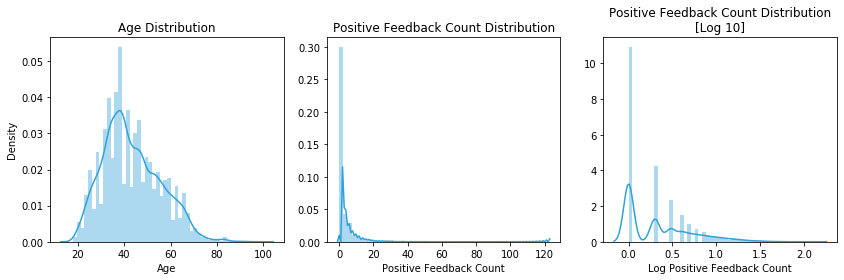

In [84]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

A simple bar plot is created using seaborn. For Log positive feedback count a values of 0.0001 is added to all the values to take the logarithm of previously zero values.

**Distribution of Age:** 
It can be seen that the age group 34-50 year old people are found to be reviewing most of the products. Also, most of the psotive feedback is found to be received by this age group only i.e. they give a rating of 4 or 5. With its single peak and slight right tail, the distribution of age is more or less normal.

**Distribution of Positive Feedback Count:**
This kind of distribution is known as Pareto Distribution also known as the 80/20 rule. Often used to describe the distribution of wealth, 20% of the population hold 80% of the wealth.

In [85]:
# Percentage Accumulation from "Most Wealthy"
def percentage_accumulation(series, percentage):
    return (series.sort_values(ascending=False)
            [:round(series.shape[0]*(percentage/100))]
     .sum()/series
     .sum()*100)

In [86]:
# Gini Coefficient- Inequality Score
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [87]:
# Cumulative Percentage of Positive Feedback assigned Percent of Reviewers (from most wealthy)
inequality = []
for x in list(range(100)):
    inequality.append(percentage_accumulation(df["Positive Feedback Count"], x))

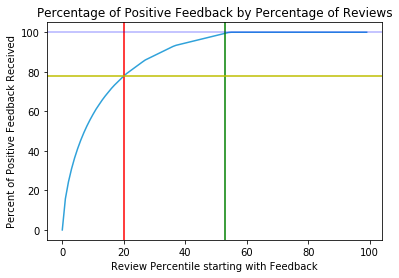

78.0% of Positive Feedback belongs to the top 20% of Reviews

Gini Coefficient: 0.76


In [88]:
# Generic Matplotlib Plot
plt.plot(inequality)
plt.title("Percentage of Positive Feedback by Percentage of Reviews")
plt.xlabel("Review Percentile starting with Feedback")
plt.ylabel("Percent of Positive Feedback Received")
plt.axvline(x=20, c = "r")
plt.axvline(x=53, c = "g")
plt.axhline(y=78, c = "y")
plt.axhline(y=100, c = "b", alpha=.3)
plt.show()

# 80-20 Rule Confirmation
print("{}% of Positive Feedback belongs to the top 20% of Reviews".format(
    round(percentage_accumulation(df["Positive Feedback Count"], 20))))

# Gini
print("\nGini Coefficient: {}".format(round(gini(df["Positive Feedback Count"]),2)))

This is pretty close to the 80/20 rule.

In economics, the Gini coefficient is a measure of statistical dispersion intended to represent the income inequality or wealth inequality within a nation or any other group of people.

Also, from the green vertical line it is evident that 47% of reviews received *no* feedback at all.

Next, lets us look at the top 20% of the top 20%.

In [89]:
# Cumulative Percentage of Positive Feedback assigned Percent of Reviewers (from most wealthy)
top_20 = df["Positive Feedback Count"].sort_values(ascending=False)[:round(df.shape[0]*(20/100))]

top_20.head()

7218     122
1294     117
7765     108
19094     99
13210     98
Name: Positive Feedback Count, dtype: int64

In [90]:
inequality = []
for x in list(range(100)):
    inequality.append(percentage_accumulation(top_20, x))
    
inequality

[0.0,
 6.974336855725685,
 11.220616778089282,
 14.582704334699159,
 17.515635108906622,
 20.213500107828335,
 22.76471856803968,
 25.072244985982316,
 27.23312486521458,
 29.234418805262024,
 31.168859176191503,
 32.9825318093595,
 34.72935087340953,
 36.38559413413845,
 38.056933362087555,
 39.60966141902092,
 41.11278844080225,
 42.56847099417727,
 44.01337071382359,
 45.37200776364029,
 46.730644813456976,
 48.015958593918484,
 49.30558550787147,
 50.517576018977785,
 51.6821220616778,
 52.87254690532672,
 54.00905758033211,
 55.076558119473795,
 56.14405865861548,
 57.23528143196032,
 58.26827690317016,
 59.23873193875351,
 60.20918697433686,
 61.20120767737761,
 62.17166271296096,
 63.10545611386672,
 63.97886564589174,
 64.87168427862842,
 65.74509381065344,
 66.61850334267847,
 67.49191287470347,
 68.32434763855942,
 69.10071166702609,
 69.87707569549278,
 70.65343972395945,
 71.44705628639207,
 72.22342031485874,
 72.99978434332543,
 73.72223420314859,
 74.41664869527712,
 75.

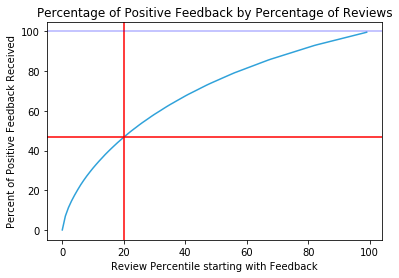

47.0% of Positive Feedback belongs to the top 20% of Reviews

Gini Coefficient: 0.38


In [91]:
# Generic Matplotlib Plot
plt.plot(inequality)
plt.title("Percentage of Positive Feedback by Percentage of Reviews")
plt.xlabel("Review Percentile starting with Feedback")
plt.ylabel("Percent of Positive Feedback Received")
plt.axvline(x=20, c = "r")
plt.axhline(y=47, c = "r")
plt.axhline(y=100, c = "b", alpha=.3)

plt.show()

# 80-20 Rule Confirmation
print("{}% of Positive Feedback belongs to the top 20% of Reviews".format(
    round(percentage_accumulation(top_20, 20))))

# Gini Coefficient
print("\nGini Coefficient: {}".format(round(gini(top_20),2)))

**Division Name and Department Name Distribution:**

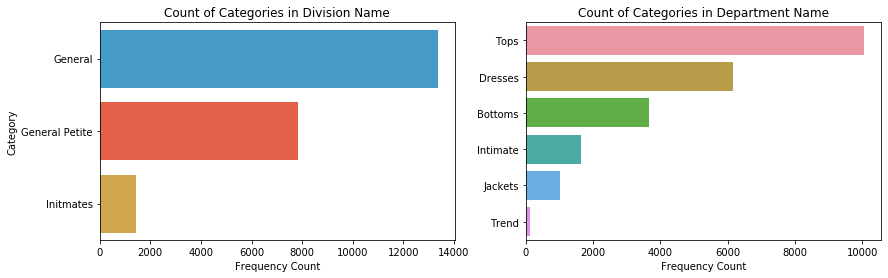

In [92]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

**Code Explanation:** <br>
Enumerating the loop enables the loop iteration to coincide with the matplotlib subplot ax.

**Distribution of Division Name** <br>
This high level feature describes had three categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

**Distribution of Department Name** <br>
It is notable to observe that *Tops and Dresses* are the most commonly reviewed products. It would be interesting to investigate the motivation of leaving a review in the first place.

***
**Distribution of Clothing ID to Understand Product Popularity**

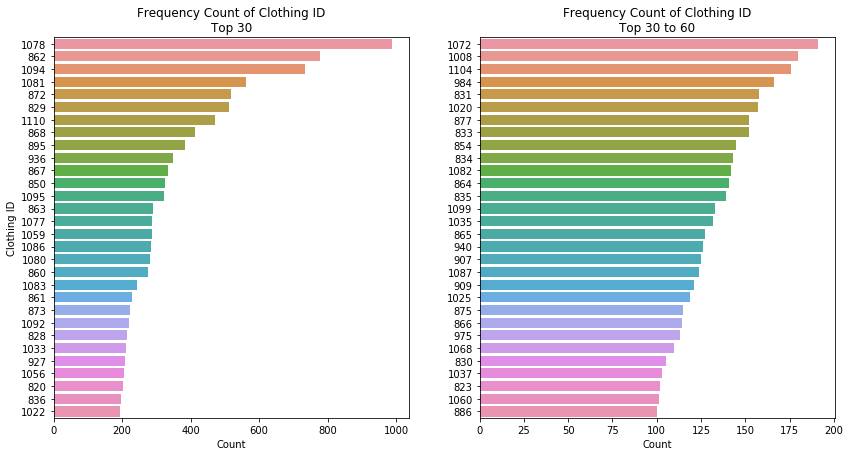

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0
Character Count,310.8604,144.836158,16.0,189.0,305.0,469.0,504.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0


In [93]:
# Clothing ID Category
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[:num].index)],
              order= df["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = df[df["Clothing ID"].isin(df["Clothing ID"].value_counts()[num:60].index)],
              order= df["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(df.shape[0]))
df[df["Clothing ID"].isin([1078, 862,1094])].describe().T.drop("count",axis=1)

In [94]:
df.loc[df["Clothing ID"].isin([1078, 862,1094]),
       ["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,1815,Beautiful dress,21
Division Name,2,General,1524
Department Name,2,Dresses,1722
Class Name,2,Dresses,1722


There are around one thousand unique *Clothing IDs*. I used boolean operators to only select the top 60 most popular cloth items, then splitting them in two plot columns.

**Interpretation**
It appears like there are around three products that receive a small magnitude more reviews than others. This is found ny observing the descriptive statistics of the top three items. These items received an average rating of 4.2, and an average recommendation rate of 81%.


**Distribution of Class Name**

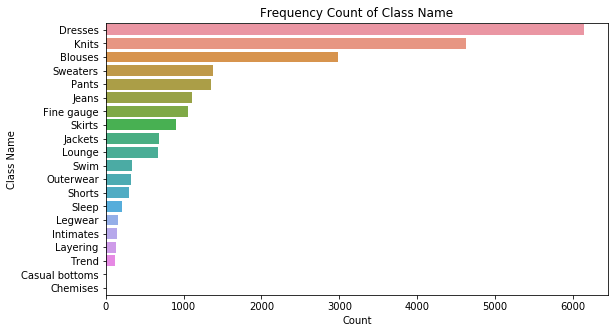

In [95]:
# Class Name
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

**Interpretation:**
Exploring the class variable suggests that the most popular clothing types are:  Dresses,Knits, Blouses, and Sweater.


**Distribution of Rating, Recommended IND, and Label:**

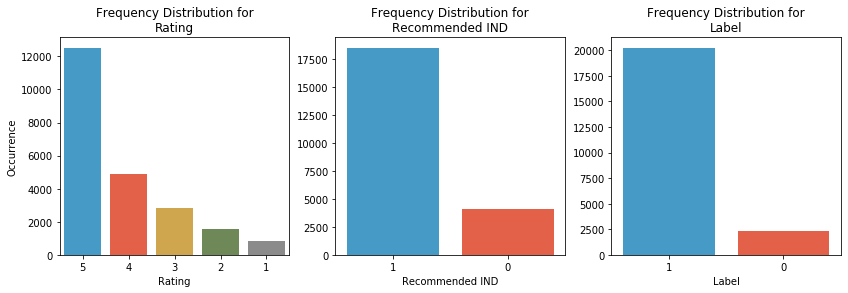

In [96]:
#cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
cat_dtypes = ["Rating","Recommended IND","Label"]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

**Distribution of Rating:**
The vast majority of reviews were highly positive, with a score of five out of five. This suggests that this retail store is performing fairly well. 

**Distribution of Recommended IND:**
This variable mirrors the positivity of the Rating distribution.

**Distribution of Label:**
In this plot, the Label plot is the binary classification of 1 = good, and 0= bad. The productsare rated 3 and over, than are recommended by the customer. These three variables helps most in finding how customers express dislike.


**Word and Length:**

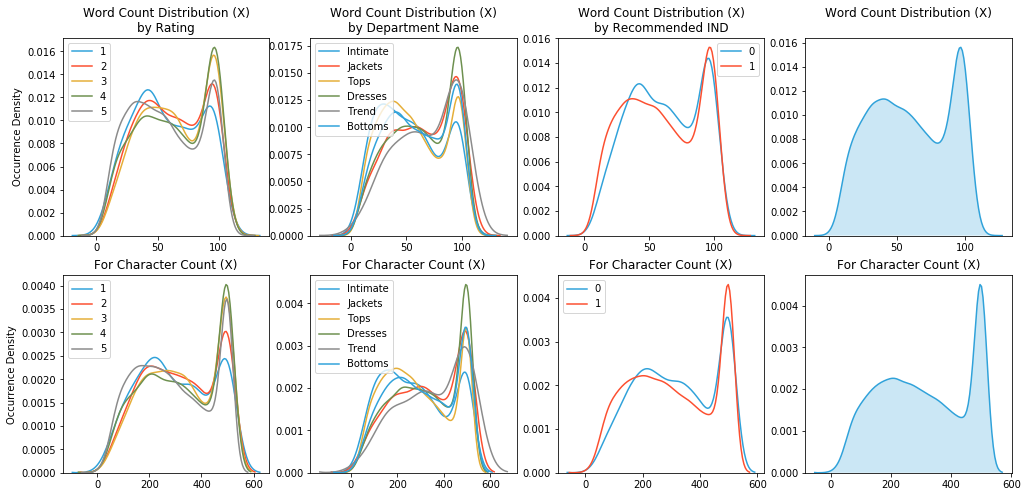

Correlation Coefficient of Word Cound and Character Count: 0.99

Total Word Count is: 1362476
Total Character Count is: 6986656


,count,mean,std,min,25%,50%,75%,max
Word Count,22628.0,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,22628.0,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0


In [97]:
f, axes = plt.subplots(2,4, figsize=(17,8), sharex=False)
for ii, xvar in enumerate(['Word Count', "Character Count"]):
    for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
        for x in set(df[y][df[y].notnull()]):
            sns.kdeplot(df[xvar][df[y]==x], label=x, shade=False, ax=axes[ii,i])
        if ii is 0:
            axes[ii,i].set_title('{} Distribution (X)\nby {}'.format(xvar, y))
        else:
            axes[ii,i].set_title('For {} (X)'.format(xvar))
    axes[ii,0].set_ylabel('Occurrence Density')
    axes[ii,i].set_xlabel('')
    # Plot 4
    sns.kdeplot(df[xvar],shade=True,ax=axes[ii,3])
    axes[ii,3].set_xlabel("")
    if ii is 0:
        axes[ii,3].set_title('{} Distribution (X)\n'.format(xvar))
    else:
        axes[ii,3].set_title('For {} (X)'.format(xvar))
    axes[ii,3].legend_.remove()
plt.show()

print("Correlation Coefficient of Word Cound and Character Count: {}".format(
    round(df["Word Count"].corr(df["Character Count"]), 2)))

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
print("Total Character Count is: {}".format(df["Character Count"].sum()))
df[["Word Count","Character Count"]].describe().T

**Interpretation:** Review Character and Word Count are highly correlated.


##  Multivariate Distribution 

###  Categorical Variable by Categorical Variable

In this section, I utilize heatmaps to visualize the percentage occurrence pivot table. I heavily utilized the technique of normalizing the proportion between variables classes by converting frequency into percentages. This technique is very fruitful because the relation upon which the percentage can be explored by aggregate, by index, and by column, each of which providing its own unique insight.

**Division Name by Department Name:**

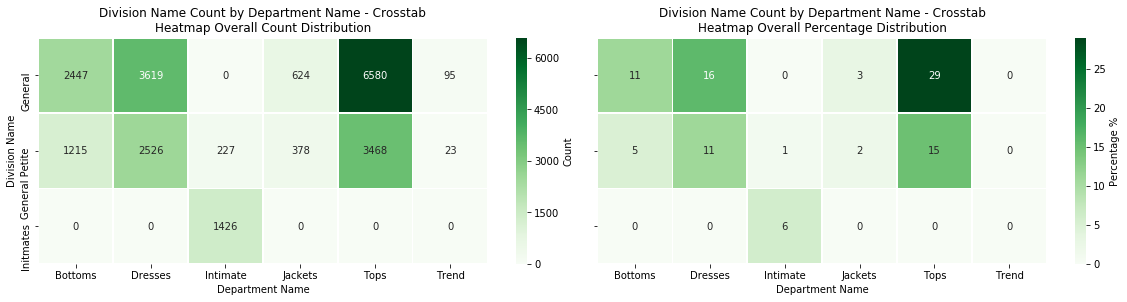

In [98]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

For first, the number of unique division per department name is shown. For the second heatmap on the right, the percentages occurrence is in relation to the whole.


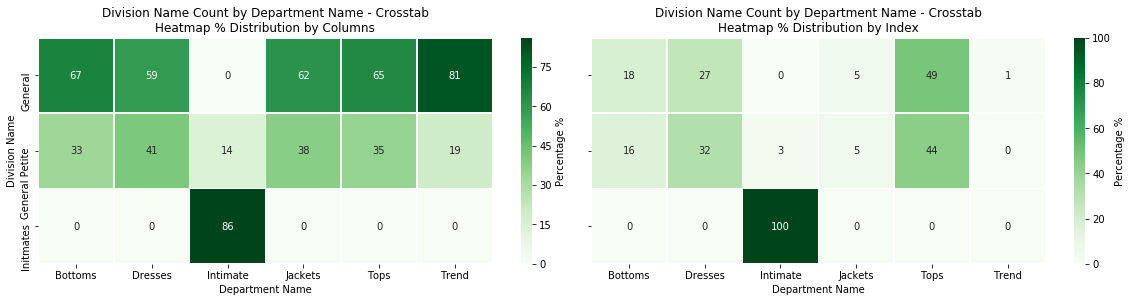

In [99]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

Although these two heatmaps use the same features, they different in the relation in which the percentage is taken. For the first plot on the left, the percentages add up to 100% by column, while the plot on the right has is normalized into percentages by row.

**Interpretation:**
The dominance of the General size is consistent across the various categories within Department Name. There a notable overall between General Petite and Department Name.


**Class Name by Department Name:**

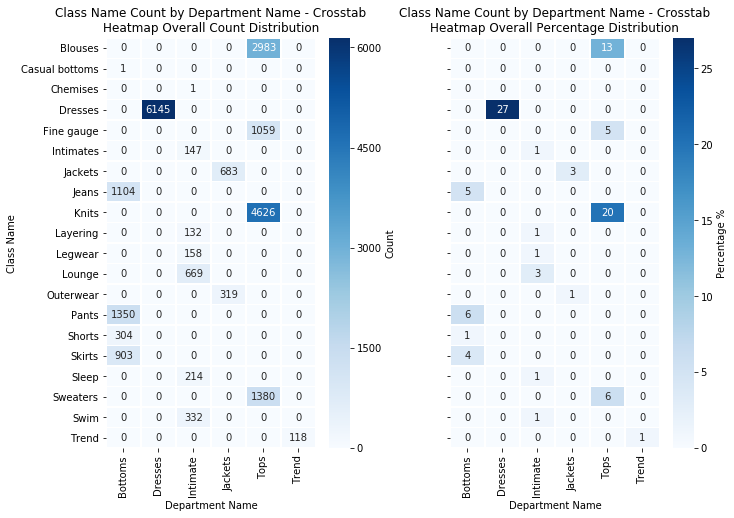

In [100]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**Interpretation:**
Here, we get a closer glimpse at the breakdown of specific clothing types. The dominance of dress popularity has been evident.

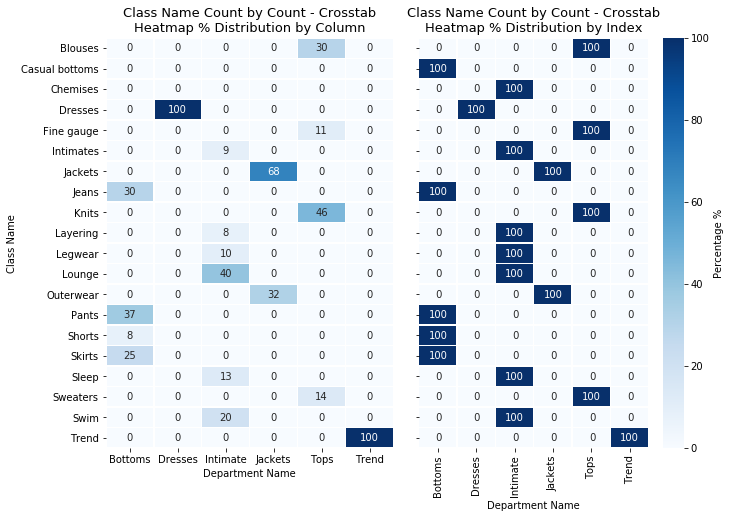

In [101]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Blues")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**Interpretation:**
This normalization of percentage by column and index explains how clothing types are distributed across departments. This provides a clear way to see which products are dominant within each category. 

**Division Name by Department Name:**

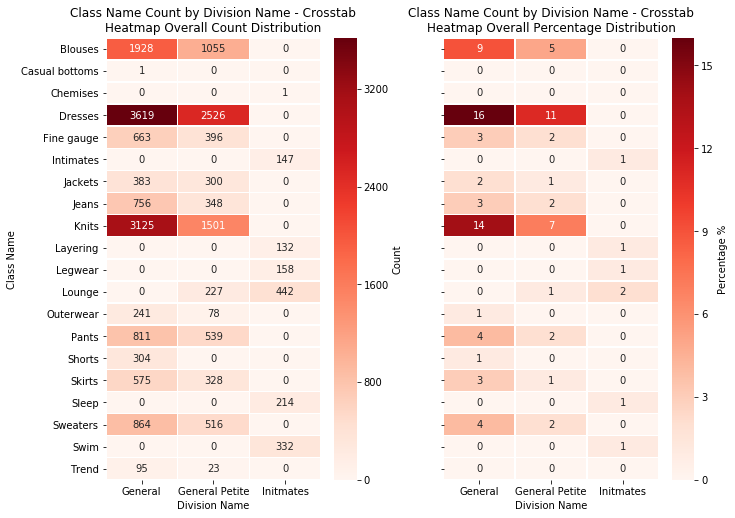

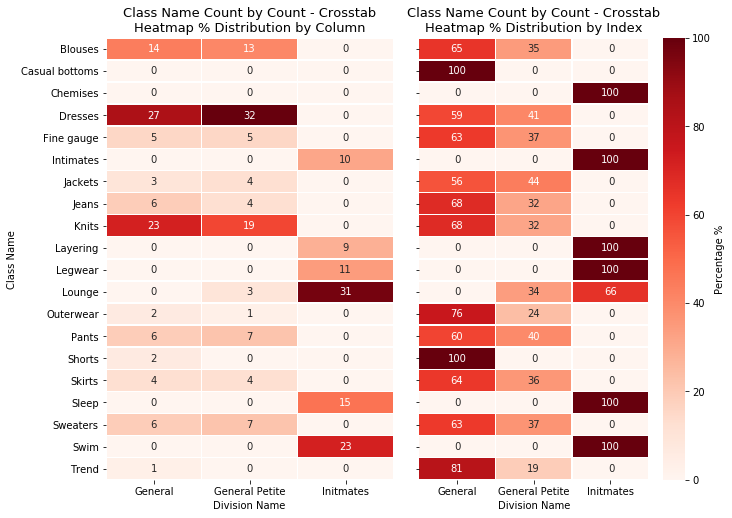

In [102]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Reds")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)

# MANUAL NORMALIZE with Applied Lambda on Pandas DataFrame
# ctab = pd.crosstab(df['Class Name'], df["Rating"]).apply(lambda r: r/r.sum(), axis=1).mul(100)

**Interpretation:** I think this plot wraps up the interplay between Blouses, Dresses. It is interesting to note that Dresses attract higher proportion of "Petite" sized customers.


###   Continuous Variable by Categorical Variable

Now, we will look at the continuous variables when sliced by various categorical variables. 

**Positive Feedback Count Distribution by Rating, Department Name, Recommended IND, and Class Name**

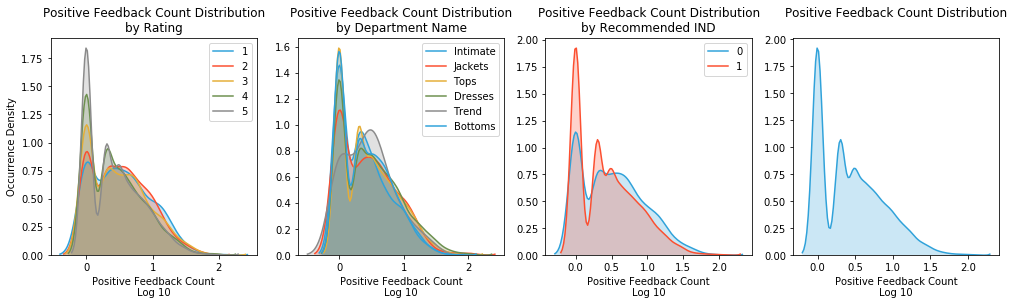

In [103]:
f, axes = plt.subplots(1,4, figsize=(17,4), sharex=False)
xvar = 'Positive Feedback Count'
plotdf = np.log10(df['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=True, ax=axes[i])
    axes[i].set_xlabel("{}\nLog 10".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))
axes[0].set_ylabel('Occurrence Density')
# Plot 4
sns.kdeplot(plotdf,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
axes[3].legend_.remove()
plt.show()

**Interpretation:**
Since Positive Feedback Count is in log form, the higher frequency of non-recommended [0] has a bigger effect than visually suggested. The more popular reviews are not recommended.

In [104]:
# Checking inequality difference:
for rec in [0,1]:
    temp = df["Positive Feedback Count"][df["Recommended IND"] == rec]

    print("Recommended is {}".format(rec))
    # 80-20 Rule Confirmation
    print("{}% of Positive Feedback belongs to the top 20% of Reviews with Recommeded = {}".format(
        round(percentage_accumulation(temp, 20)),rec))
    # Gini
    print("Gini Coefficient: {}\n".format(round(gini(temp),2)))

Recommended is 0
75.0% of Positive Feedback belongs to the top 20% of Reviews with Recommeded = 0
Gini Coefficient: 0.73

Recommended is 1
78.0% of Positive Feedback belongs to the top 20% of Reviews with Recommeded = 1
Gini Coefficient: 0.76



**Interpretation:** The difference is not huge, but nevertheless, a higher gini coefficient signigies higher inequality. This means that there is a bigger divergence between recommended reviews than there is between non-recommended reviews.


**Positive Feedback Count by Class Name:**

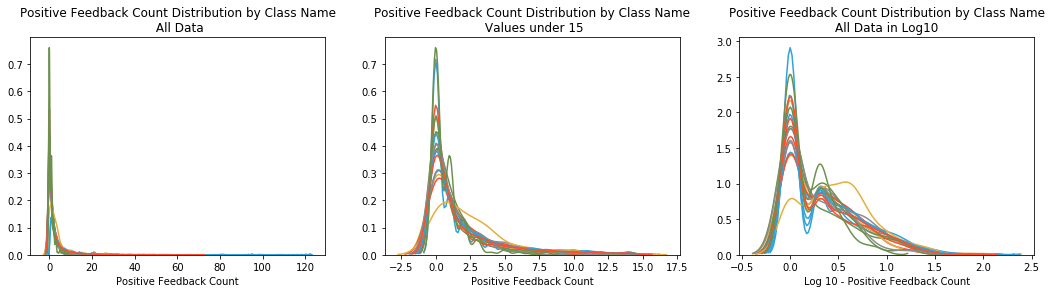

In [105]:
f, axes = plt.subplots(1,3, figsize=(18,4), sharex=False)
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[0])
    
axes[0].legend_.remove()
axes[0].set_xlabel('{}'.format(xvar))
axes[0].set_title('{} Distribution by {}\n All Data'.format(xvar, "Class Name"))

min_value = 15
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][(df["Class Name"]==x) &
                                              (df["Positive Feedback Count"] < min_value)]
                ,label=x, shade=False, ax=axes[1])
    
axes[1].legend_.remove()
axes[1].set_xlabel('{}'.format(xvar))
axes[1].set_title('{} Distribution by {}\n Values under {}'.format(xvar, "Class Name", min_value))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(np.log10(df['Positive Feedback Count']+1)[df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[2])
    
axes[2].legend_.remove()
axes[2].set_xlabel('Log 10 - {}'.format(xvar))
axes[2].set_title('{} Distribution by {}\nAll Data in Log10'.format(xvar, "Class Name"))
plt.show()

There are too many classes to include a legend. A statistical test method would operate better at this dimensionality.


**Age Distribution by the Usual Suspects.. round them up**

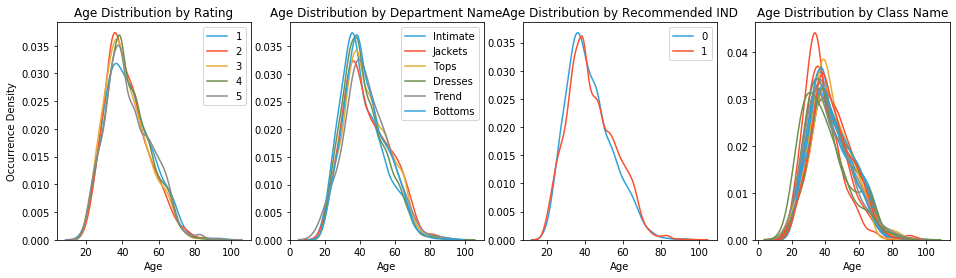

In [106]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurrence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
plt.show()

**Interpretation:** 
Unlike Positive Feedback Count, Age has not been transformed into a logarithm. For these reasons, slight noise between the age distribution by these features are nothing to worry about. Age doesn't seem to receive influence on these dimensions.



### Continuous Variables  on Continuous Variables


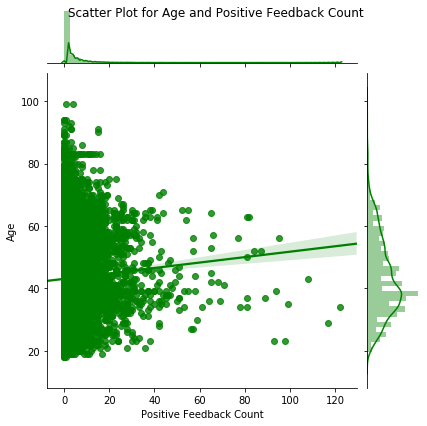

In [107]:
# Normalization is futile here.. But here is a minmax standardization, and a z-score normalization function. 
def minmaxscaler(df):
    return (df-df.min())/(df.max()-df.min())
def zscorenomalize(df):
    return (df - df.mean())/df.std()

g = sns.jointplot(x= df["Positive Feedback Count"], y=df["Age"], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.show()

 he distribution plot up clearly shows that most points of positive feedback count reside at ZERO.

**Interpretation:**
There appears to be a slight correlation between age and positive feedback count received. 

###  Percentage Standardize Distribution Plots

Since many variables are severely unbalanced, I employ standardization by percentage to see if the proportion is consistent between categorical classes. This is the same idea used previously on heatmaps now applied to barcharts.


In [108]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

Many transformation are conducted here.
- Groupby([x])[hue]: Groups the data by the x variable, what will become the X axis of the barplot.
- Value_counts(normalized=True): Then the hue variable, which is rowed by the x variable, is ordered by most frequent to least, and that value is converted to decimal percentage.
- rename().mull(100): Then this is renamed to "Percentage", and the decimal value is multiplied by 100 to be in proper percentage units.


**Recommended IND by Department and Division**

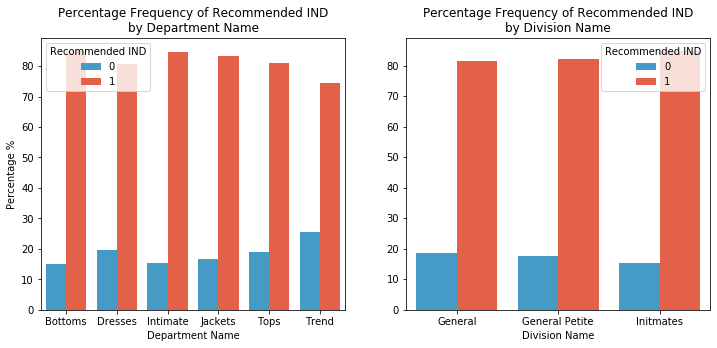

In [109]:
huevar = "Recommended IND"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x="Department Name",y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby Department Name".format(huevar))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x="Division Name",y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby Division Name".format(huevar))
axes[1].set_ylabel("")
plt.show()

**Rating by Department and Divison Name**

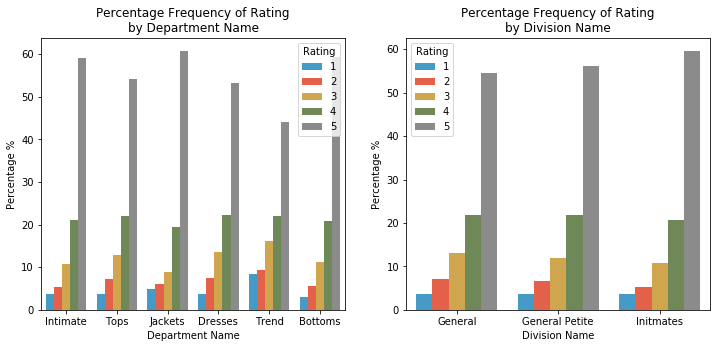

In [110]:
xvar = ["Department Name","Division Name"]
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x=xvar[0],y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[0]))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x=xvar[1],y="Percentage", hue="Rating",data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.show()

Department and Divison are consistent with the overall distribution of Rating.

***
**Positive Feedback Count over 40 by Recomended IND and Rating**

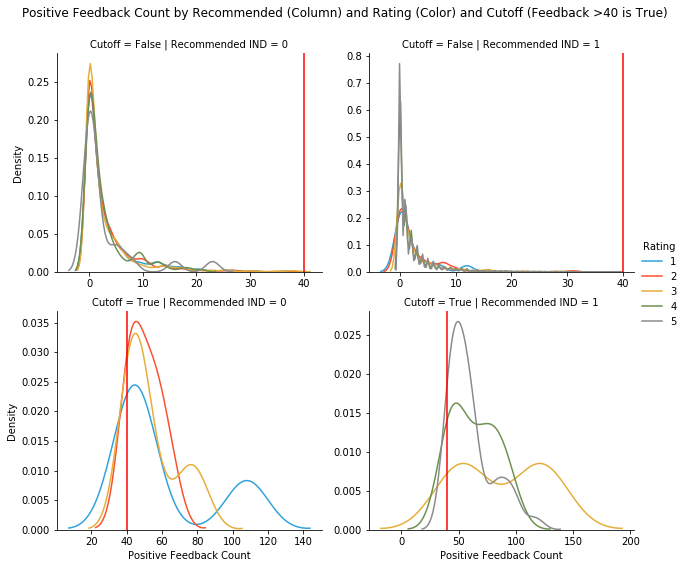

In [111]:
# Cuttoff Variable
df["Cutoff"] = df["Positive Feedback Count"] >= 40 # Temporary variable for facetgrid
# Facet Grid Plot
g = sns.FacetGrid(df, row = "Cutoff", col="Recommended IND",
                  hue="Rating", size=4, aspect=1.1, sharey=False, sharex=False)
g.map(sns.distplot, "Positive Feedback Count", hist=False)
g.add_legend()
g.axes[0,0].set_ylabel('Density')
g.axes[1,0].set_ylabel('Density')
plt.subplots_adjust(top=0.90)
g.fig.suptitle('Positive Feedback Count by Recommended (Column) and Rating (Color) and Cutoff (Feedback >40 is True)')

# Give cutoff line to each plot.
for x in [0,1]:
    for y in [0,1]:
        g.axes[x,y].axvline(x=40, c="r")

plt.show()
del df["Cutoff"]

The red vertical line corresponds to the cutoff rule. 


**Rating by Recommended IND**


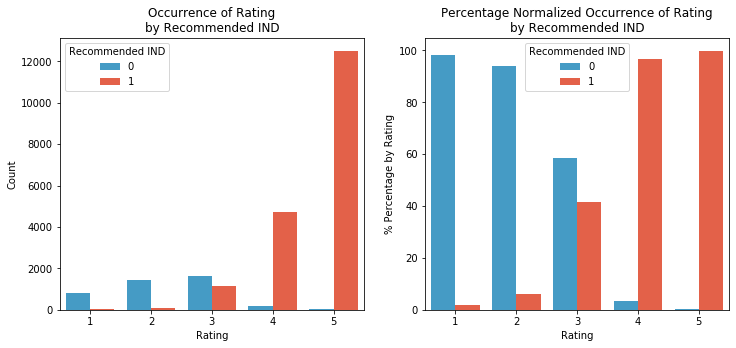

In [112]:
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Rating", hue="Recommended IND",data=df, ax=axes[0])
axes[0].set_title("Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x="Rating",y="Percentage", hue="Recommended IND",data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

There is a conflicting interest between the customers personal interaction with the product, such as the personal size fit, experience, and other personal synergies, and what the customer would invision for other customers.

Looking at the data, it appears like five star ratings are void of non-recommendations, but low rated products are recommended a small amount of the time.



## Multivariate Analysis and Descriptive Statistics


Here, we look at how averages and other descriptive statistics behave when cut up.

**Rating by Recommended IND**

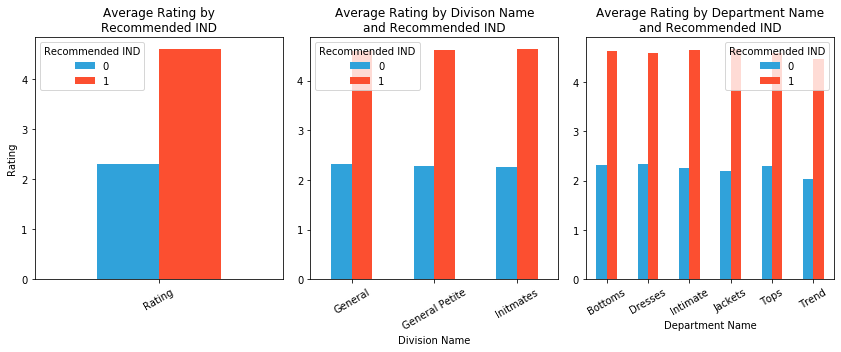

In [113]:
f, axes = plt.subplots(1,3,figsize=(12,5))
rot = 30
df.pivot_table('Rating',
               columns=['Recommended IND']).plot.bar(ax=axes[0],rot=rot)
axes[0].set_title("Average Rating by\nRecommended IND")
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[1].set_title("Average Rating by Divison Name\nand Recommended IND")
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended IND']).plot.bar(ax=axes[2], rot=rot)
axes[0].set_ylabel("Rating")
axes[2].set_title("Average Rating by Department Name\nand Recommended IND")
f.tight_layout()
plt.show()

**Interpretation:** <br>
Rating is just under max rating when recommended, and halfed when not recommended. Trend is consistent across Division and Department.

***
**Correlating Average Rating and Recommended IND by Clothing ID** <br>
Analysis of data grouped by Clothing ID.

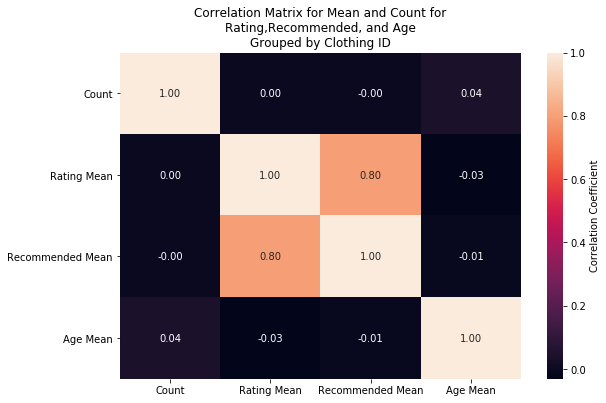

In [114]:
temp = (df.groupby('Clothing ID')[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended IND Count",
                "Recommended Mean","Age Count","Age Mean"]
temp.drop(["Recommended IND Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, and Age\nGrouped by Clothing ID")
plt.show()

This aggregation investigates if there is trend between average rating and number of reviews by product. 

**Interpretation:** 
This correlation heatmap suggest that there is in fact no correlation between count and average value, which means that the popularity of the item does not lead to differential treatment when it comes to average scoring. The age variable behaves in this same as well.

However, There is a strong positive correlation of .80 between rating and recommended IND mean.

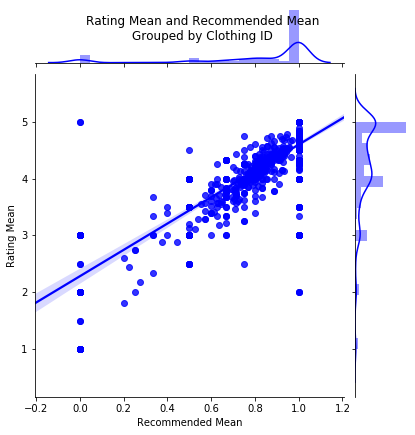

In [115]:
g = sns.jointplot(x= "Recommended Mean",y='Rating Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Rating Mean and Recommended Mean\nGrouped by Clothing ID")
plt.show()

This plot displays that these outliers are not very strongly represented. Indeed, the average count for the **LOW QUADRANT**, as labeled at the bottom left of the plot, is only 2.3. 


**Correlating Average Rating and Recommended IND by Class Name** 

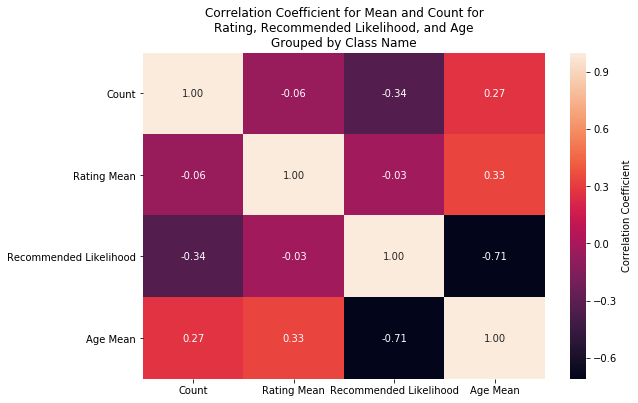

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [116]:
key = "Class Name"
temp = (df.groupby(key)[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended Likelihood Count",
                "Recommended Likelihood","Age Count","Age Mean"]
temp.drop(["Recommended Likelihood Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}".format(key))
plt.show()
print("Class Categories:\n",df["Class Name"].unique())


##  Working with Text 

Let us analyse the customer reviwes.

###  Text Pe-Processing

In [117]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
21599,Decadent and delightful*,"Dress is beautiful in person, light material that is excellent for summer.\r\n\r\nthis dress is not forgiving in the chest, so ladies if you bigger chested i suggest going up a size or two. i'm 5'4, 145 lbs and 34ddd, i usually wear 8 or 10, this dress in a 10 made my look like i was wearing an unflattering sports bra.",4
22439,"Cute shirt, but not cute on my figure","I have more of an athletic figure, and the sleeves tend to come in closer to the body than pictured. i didn't like that cut on my arms/torso. the shirt is really cute, otherwise! i am usually a size 4/small and this was a little short and snug.",3
8713,Perfect basic!,"Get this one during the 20% sale. if you dry clean it, you will have it forever!",5
811,Flattering,"Very slimming, lovely dress.\r\na nice addition to your fall/ winter wardrobe.\r\nthe embroidery is lovely, fabric soft and comfortable. sized perfectly. \r\nso happy with this beautiful black dress!!!",5
919,Wonderful skirt,I ordered this skirt online in a size 8 but returned for a 10 so it could sit a bit lower.\r\n\r\nthe fabric is so beautiful and a bit heavier so it can be worn all year long.\r\nso glad i made this purchase.,5
2136,Chic,Love this. can be a jacket or blazer syle. fits well.,5
15679,"Love, love, love!!","I ordered a m/l in this vest and it fits perfectly. thirst is cozy and stylish. in fact, i ordered the same vest in another color! it's versatile enough to wear with both skirts and jeans. i also think it's a timeless piece that will stay in style for years to come.",5


Evidently, the text data requires further processing .

In [118]:
import nltk
nltk.download('stopwords')
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



This chunk of code creates a function that takes each review and combines them into one seamless text. It then applies lowercase, tokenizer, removes stopwords and punctuation, and finally uses the PorterStemmer.



**Interpretation:**
In order to process the data set's centerpiece, the review body, I utilized the NLTK package to lowercase, tokenize, and remove stopwords and punctuation. Tokenizing treats each word as its own value, while the other steps gets rid of the noise and irrelevant symbols in the data, standardizing the reviews for analysis. Upon reviewing the performance of text analysis, I decided to implement the Porter Stemmer on the tokens in order to combine words with tense and plurality deviance. 



###  Sentiment Analysis

Let us first understand the customer reviews to see how the textual sentiment relates to the rating scores. With this method, it will be possible to distinguish outright positive and negative comments from the constructive variant.

In [119]:
nltk.download('vader_lexicon')
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


*Pre-processing* chunk loads the NLTK Sentiment Intensity Analyzer module, selects desired variables, and finally applies lowercasing to the column of reviews in the dataframe. The second paragraph of code *Applying Model and Variable Creation* classifies each review in the dataset on three dimensions: Positive, Neutral, and Negative. These results are stored in three respective columns. The overall sentiment is then determined and stored in the Sentiment column.

- **Neutral/Negative/Positive Score:** Indicates the potency of these classes between 0 and 1.
- **Polarity Score:** Measures the difference between the Positive/Neutral/Negative values, where a positive numbers closer to 1 indicates overwhelming positivity, and a negative number closer to -1 indicates overwhelming negativity.



**Normalize Plots for Sentiment Distribution**

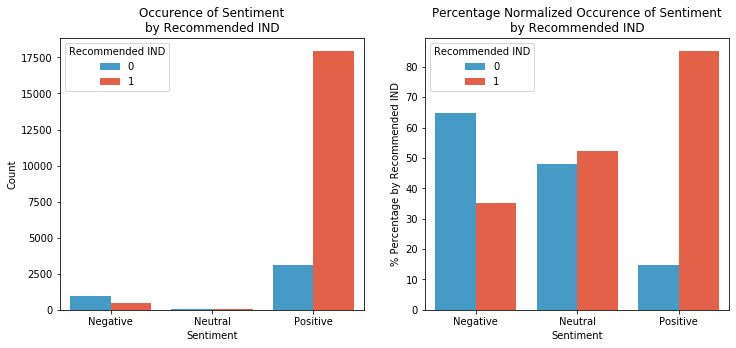

In [120]:
huevar = "Recommended IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

Recommended is a variable that clearly indicates positive sentiment in the review.

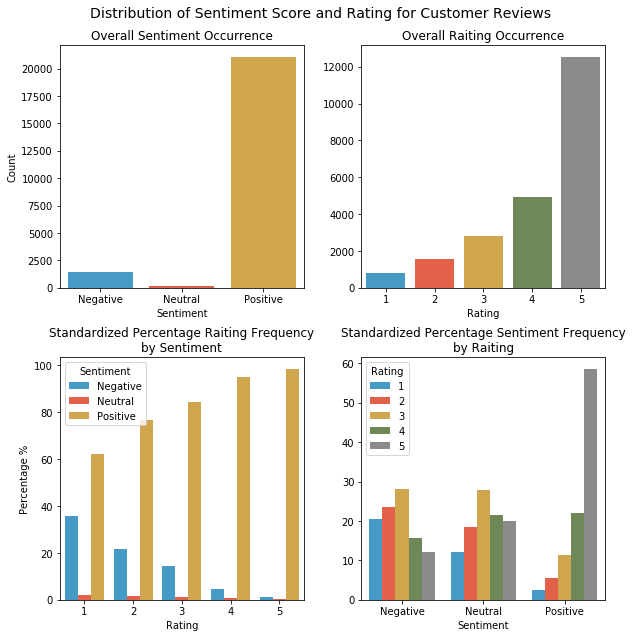

In [121]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

The last chunk, Visualization, plots the frequency of sentiments in a bar plot using matplotlib.

**Interpretation:**
Like the distribution of rating, most reviews have a positive sentiment. Unlike the distribution of rating, there is a lower occurrence of neutral rating is lower in proportion to the occurrence of medium ranged ratings.

The rating of positive sentiment reviews have an increasing occurrence as the rating gets higher. But, but negative and neutral sentiment reviews, the highest occurrence rating has 3 rating, further emphasizing that people's motivation of assigning a review score of three are multiple.

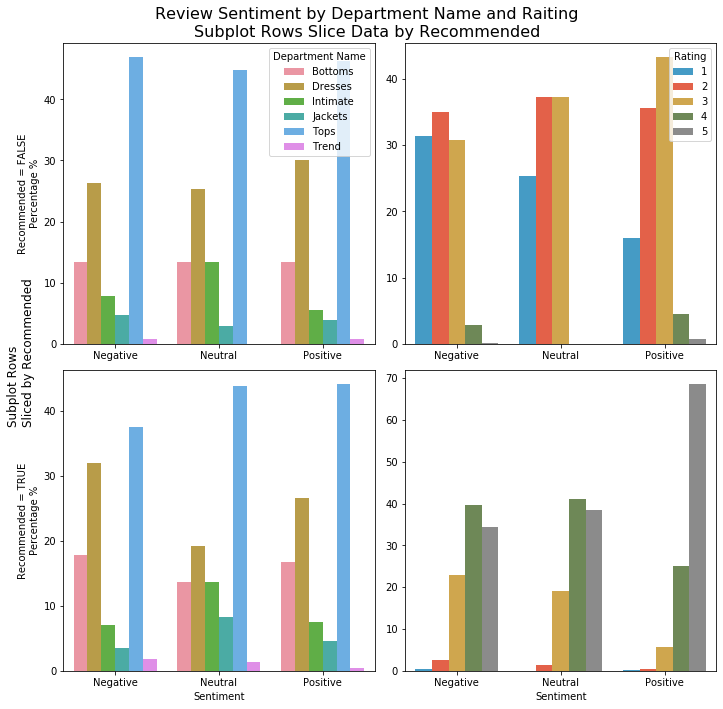

In [122]:
# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

In this plot, the upper and lower rows use the same variables, but the upper row is for non-recommended reviews, while the bottom row is for recommended reviews. This enables use to explore the nature of recommended reviews in terms of the mood of the writing, as well as the rating assigned by the customer.

**Interpretation:**
While the distribution of departments does not seem to change depending on status of recommendation, rating is almost entirely inverted. 

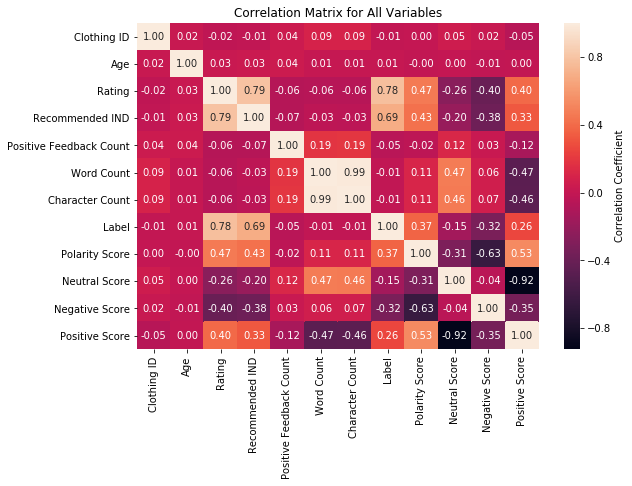

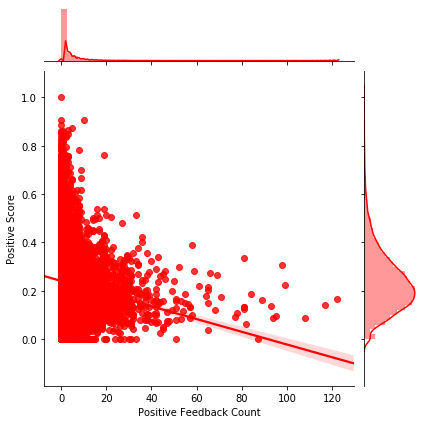

In [123]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()

# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

Interestingly, there appears to be a substantial negative correlation between Positive Feedback Count and Positive Score, which suggests that the most acclaimed reviews on the platform are probably in the form on constructive criticism, rather than outright positivity.
***

## Word Distribution and Word Cloud 

In [124]:
stopwords = set(STOPWORDS)
size = (10,7)

In [125]:
def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()

In [126]:
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

In [127]:
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

This code creates the word cloud visualization function. Within the function, the Setting Function Parameter section creates the graphic structure using matplotlib. Then the text is formatted, and the word frequency is determined. Finally, the matplotlib structure is filled with words, where the larger the word size, the higher the word occurrence. 

### Visualize Titles

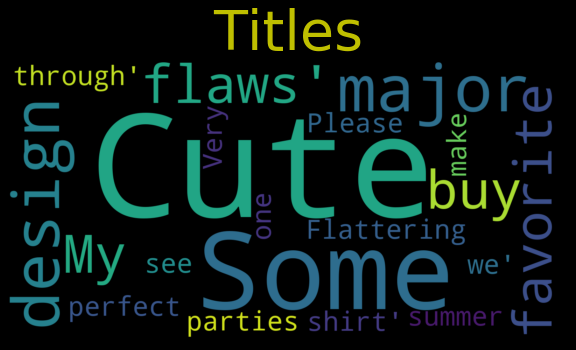

In [128]:
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

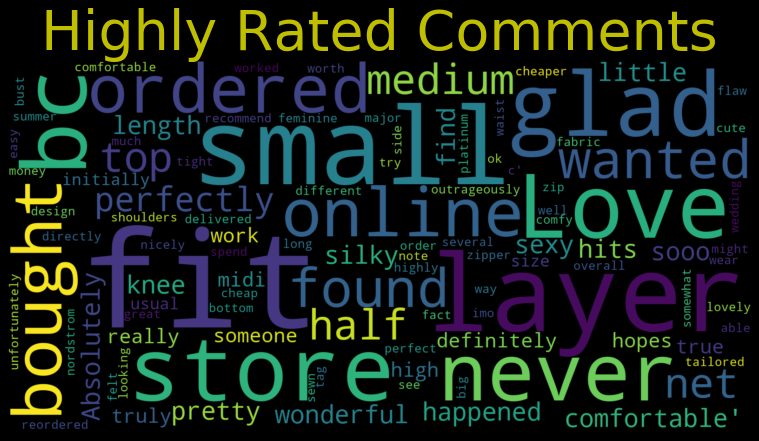

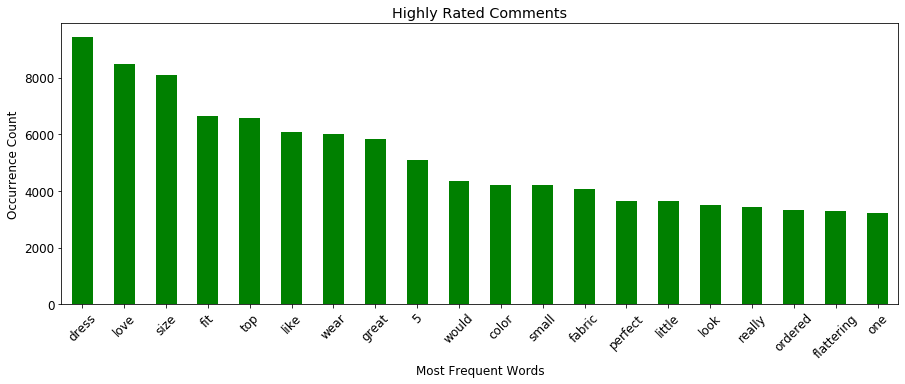

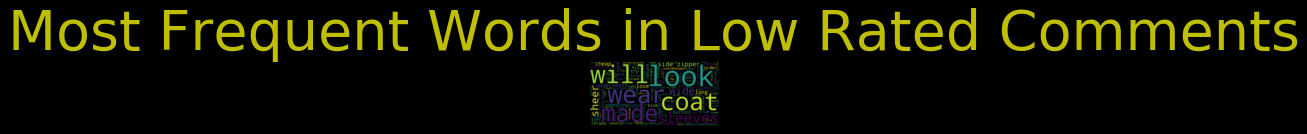

In [129]:
# Highly Raited
title ="Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

The central flaw of these word clouds is that they only show the distribution of individual words. This removes the context of the word, as well as disregard negative prefixes. In order to solve this problem I will utilize n-grams, which increases the size of observed values from one word to multiple words, enabling frequency counts to be conducted to word sequences.

**Taking a Different Lense: WordClouds by Department Name** <br>

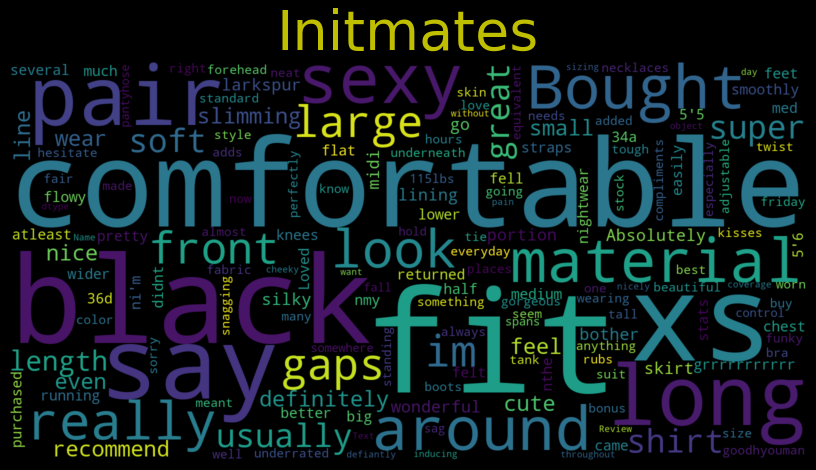

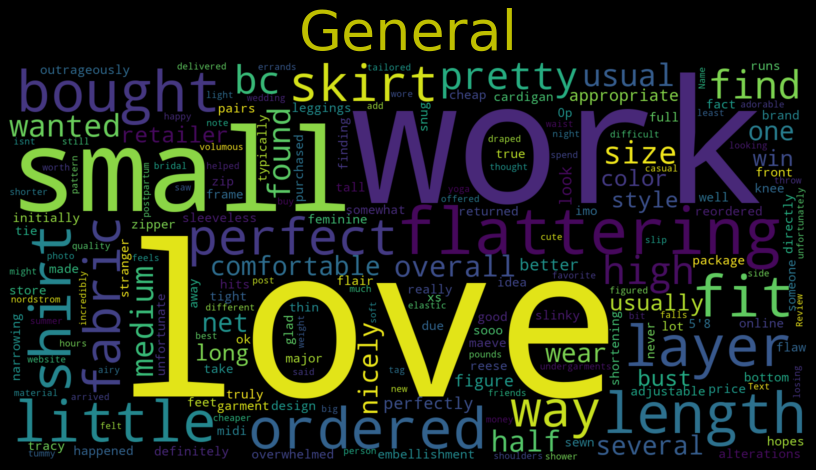

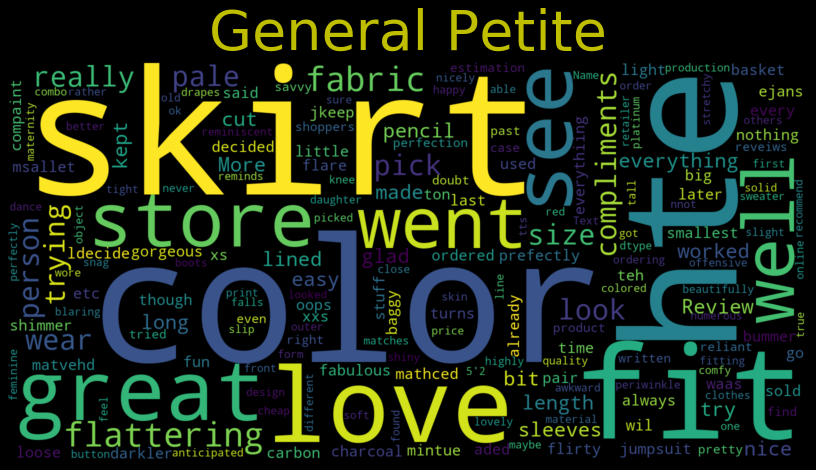

In [130]:
department_set = df["Department Name"][df["Department Name"].notnull()].unique()
division_set = df["Division Name"][df["Division Name"].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="{}".format(subclass),
          stopwords= new_stop,
          size = (10,6))
    
# Plot
cloud_by_category(df, "Division Name", division_set[0])
cloud_by_category(df, "Division Name", division_set[1])
cloud_by_category(df, "Division Name", division_set[2])